#IMPORT PACKAGE AND LOAD DATA




In [8]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt


#CLEAN AND PROCESS DATA



In [9]:
my_df = pd.read_csv('sales2019.csv')
my_df


,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,1,1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,2,2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,3,3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,4,4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...,...
105309,105309,115679,242380,Flatscreen TV,1,300.00,08/06/19 08:12,"572 Jefferson St, Dallas, TX 75001"
105310,105310,115680,242381,USB-C Charging Cable,1,11.95,08/23/19 06:41,"796 Dogwood St, New York City, NY 10001"
105311,105311,115681,242382,AA Batteries (4-pack),1,3.84,08/07/19 21:03,"290 14th St, Portland, OR 97035"
105312,105312,115682,242383,iPhone,1,700.00,08/24/19 15:50,"773 Hickory St, New York City, NY 10001"


In [10]:
my_df = my_df.dropna(how = 'all')
my_df = my_df[my_df['Product'] != 'Product']
my_df.drop_duplicates(inplace = True)

In [11]:
set(my_df['Product'])
my_df


,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,1,1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,2,2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,3,3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,4,4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...,...
105309,105309,115679,242380,Flatscreen TV,1,300.00,08/06/19 08:12,"572 Jefferson St, Dallas, TX 75001"
105310,105310,115680,242381,USB-C Charging Cable,1,11.95,08/23/19 06:41,"796 Dogwood St, New York City, NY 10001"
105311,105311,115681,242382,AA Batteries (4-pack),1,3.84,08/07/19 21:03,"290 14th St, Portland, OR 97035"
105312,105312,115682,242383,iPhone,1,700.00,08/24/19 15:50,"773 Hickory St, New York City, NY 10001"


**Convert the 2 column types "Quantity Ordered" and "Price Each"**

In [12]:
my_df['Quantity Ordered'] = pd.to_numeric(my_df['Quantity Ordered'],downcast= 'integer')
my_df['Price Each'] = pd.to_numeric(my_df['Price Each'], downcast='float')

**Calculate the value of each order**

In [13]:
my_df['Sale'] = my_df['Price Each'] * my_df['Quantity Ordered']
my_sale = my_df.pop('Sale')
my_df.insert(4,'Sales',my_sale)


In [14]:
my_prd = my_df.groupby('Product').sum()['Sales'].sort_values(ascending= False)

<ipython-input-14-4c3142002142>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  my_prd = my_df.groupby('Product').sum()['Sales'].sort_values(ascending= False)


#WHICH PRODUCT IS BEST SELLER?


In [15]:
prd = []
sl = []
for x,y in my_prd.items():
    prd.append(x)
    sl.append(y)
print(prd)
print(sl)
print

['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Apple Airpods Headphones', 'Flatscreen TV', 'Bose SoundSport Headphones', '27in FHD Monitor', 'Vareebadd Phone', '20in Monitor', 'LG Washing Machine', 'LG Dryer', 'Lightning Charging Cable', 'USB-C Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)']
[4530500.0, 2755900.0, 2357976.5, 1927800.0, 1361065.125, 1351624.375, 1334550.0, 815700.0, 760523.9375, 650356.6875, 480000.0, 251987.078125, 241800.0, 238200.0, 196398.140625, 160894.796875, 139827.375, 60142.078125, 52190.44921875]


<function print>

**Revenue chart by product**

In [16]:
my_prd

Product
Macbook Pro Laptop            4.530500e+06
iPhone                        2.755900e+06
ThinkPad Laptop               2.357976e+06
Google Phone                  1.927800e+06
27in 4K Gaming Monitor        1.361065e+06
34in Ultrawide Monitor        1.351624e+06
Apple Airpods Headphones      1.334550e+06
Flatscreen TV                 8.157000e+05
Bose SoundSport Headphones    7.605239e+05
27in FHD Monitor              6.503567e+05
Vareebadd Phone               4.800000e+05
20in Monitor                  2.519871e+05
LG Washing Machine            2.418000e+05
LG Dryer                      2.382000e+05
Lightning Charging Cable      1.963981e+05
USB-C Charging Cable          1.608948e+05
Wired Headphones              1.398274e+05
AA Batteries (4-pack)         6.014208e+04
AAA Batteries (4-pack)        5.219045e+04
Name: Sales, dtype: float32

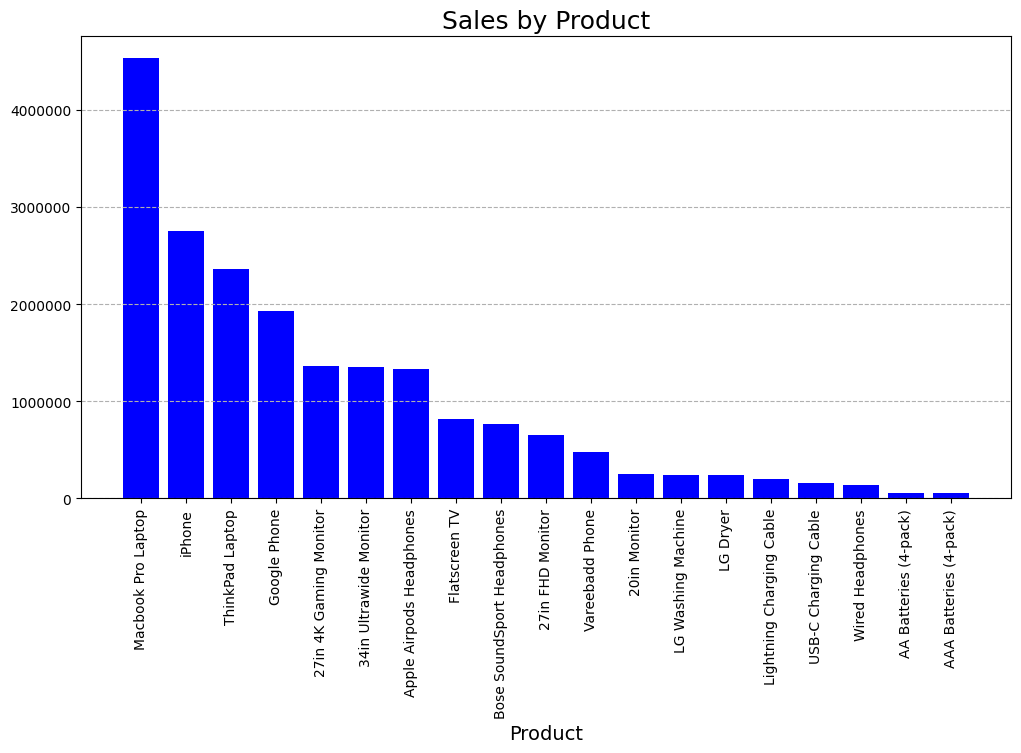

In [17]:
plt.bar(x=prd, height=sl, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Product', size=14)
plt.grid(axis='y', linestyle='--')
plt.gcf().set_size_inches(12, 6)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales by Product', size=18)
    
plt.show()

#NUMBER OF SALE PER PRODUCT

**Sales quantity of each product?**


In [18]:
my_qtt = my_df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending= False,)
my_qtt
    

<ipython-input-18-e9e51306f051>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  my_qtt = my_df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending= False,)


Product
AAA Batteries (4-pack)        17455
AA Batteries (4-pack)         15662
USB-C Charging Cable          13464
Lightning Charging Cable      13137
Wired Headphones              11662
Apple Airpods Headphones       8897
Bose SoundSport Headphones     7606
27in FHD Monitor               4336
iPhone                         3937
34in Ultrawide Monitor         3557
27in 4K Gaming Monitor         3490
Google Phone                   3213
Flatscreen TV                  2719
Macbook Pro Laptop             2665
ThinkPad Laptop                2358
20in Monitor                   2291
Vareebadd Phone                1200
LG Washing Machine              403
LG Dryer                        397
Name: Quantity Ordered, dtype: int64

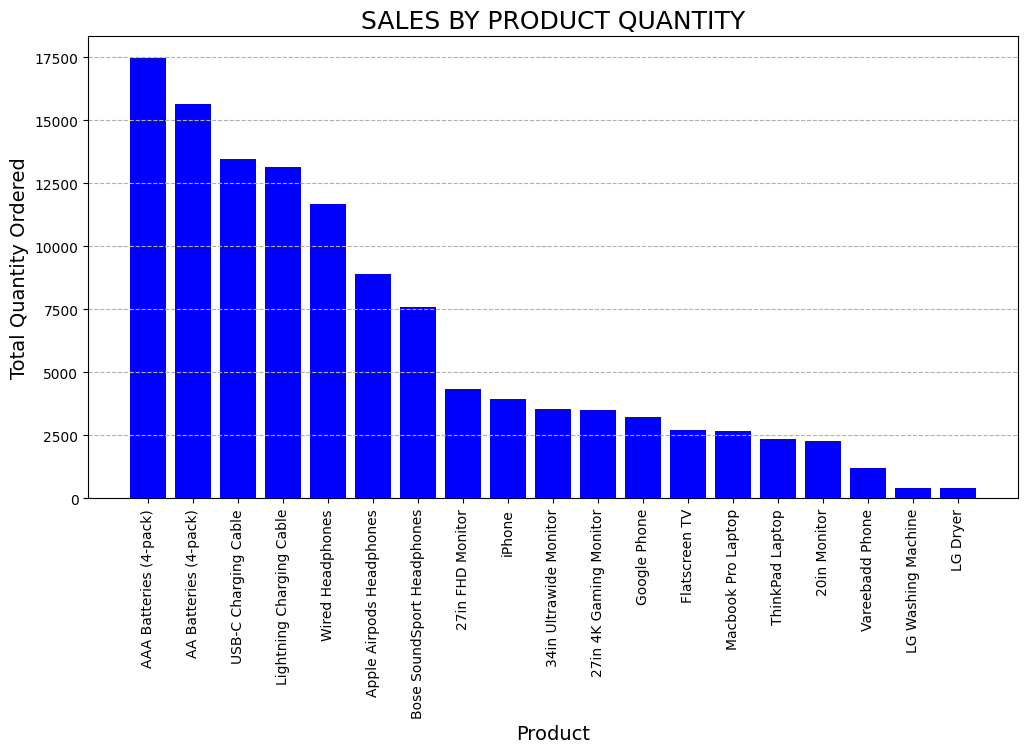

In [19]:
prd = []
qtt = []
for x,y in my_qtt.items():
    prd.append(x)
    qtt.append(y)
plt.bar(x=prd, height=qtt, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Product', size=14)
plt.ylabel('Total Quantity Ordered', size=14)
plt.grid(axis='y', linestyle='--')
plt.gcf().set_size_inches(12, 6)
plt.title('SALES BY PRODUCT QUANTITY', size=18)
plt.show()

#REVENUE OF EACH CITY

**Add the "city" column to the chart**

In [20]:
def split_city(x):
    x= str(x)
    city = x.split(',')
    return city[1]
my_df['City'] = my_df['Purchase Address'].apply(lambda x:split_city(x))


IndexError: ignored

In [ ]:
rvn_city = my_df.groupby('City').sum()['Sales'].sort_values()
city = []
revenue_ct = []
for x,y in rvn_city.items():
    city.append(x)
    revenue_ct.append(y)
print(city)
print(revenue_ct)


**Print out revenue of each city**


In [ ]:
rvn_city

In [ ]:
plt.bar(x = city, height = rvn_city, )
plt.xticks(rotation= 90)
fit = plt.gcf().set_size_inches(12,6)
for i in range(len(city)):
    plt.annotate((rvn_city[i]), xy=(city[i], (rvn_city[i])), ha='center', va='bottom')
plt.title('REVENUE BY CITY',size = 20)
plt.ylabel('Revenue (USA)',size= 15)
plt.xlabel('City',size= 15)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis = 'y',linestyle = '-.')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
explode = (0, 0.1, 0, 0, 0, 0, 0, 0.1, 0.1)
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#2E86C1', '#5DADE2', '#F4D03F', '#58D68D']
ax.pie(revenue_ct, labels=city, autopct='%1.1f%%', explode=explode, colors=colors, startangle=90, textprops={'fontsize': 12})
ax.axis('equal')
ax.set_title('Revenue by City', fontsize=14, fontweight='bold')
plt.savefig('revenue_by_city.png')

#HOURLY REVENUE

In [ ]:
def split_hour(x):
   x = str(x)
   row_time = x.split('/')[-1]
   row_time = row_time.split(' ')[-1]
   h = row_time.split(':')[0]
   if len(h)==1:
      return  '0' + h  
   return h
my_df['Hour'] = my_df['Order Date'].apply(lambda x: split_hour(x))

In [ ]:
revenue_hour = my_df.groupby('Hour').sum()['Sales'].sort_index()
rv_hour = []
hour = []
for x,y in revenue_hour.items():
    hour.append(x)
    rv_hour.append(round(y,1))

In [ ]:
revenue_hour

In [ ]:
plt.plot(hour,rv_hour, 'go-',color = 'red')
plt.gcf().set_size_inches(12, 8)
plt.grid(linestyle = '-.')
plt.title('HOURLY REVENUE')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Hour',size = 14)
plt.ylabel('Revenue',rotation=90,size = 14)
plt.show()

#MONTHLY REVENUE

In [ ]:
def split_hour(x):
   x=str(x)
   row_month = x.split('/')[0]
   if len(row_month)==1:
      return '0'+ row_month
   return row_month
my_df['Month'] = my_df['Order Date'].apply(lambda x: split_hour(x))
revenue_month = my_df.groupby('Month').sum()['Sales']

In [ ]:
month = []
rv_month = []
for x,y in revenue_month.items():
    month.append(x)
    rv_month.append(y)
revenue_month

In [ ]:
plt.bar(height=rv_month, x = month)
plt.grid()
plt.title("MONTHLY REVENUE",size = 20)
plt.xlabel("Month",size = 14)
plt.ylabel("Revenue (USD)",size = 14)
plt.xticks(month)
for i in range(len(rv_month)):
    plt.annotate(str(rv_month[i]),xy=(month[i],rv_month[i]),ha='center', va='bottom')
plt.ticklabel_format(style='plain', axis='y')
plt.gcf().set_size_inches(12, 6)
plt.show()

In [ ]:
my_df.head(30)